$$ ITI \space AI-Pro: \space Intake \space 45 $$
$$ Deep \space Learning $$
$$ Lab \space no. \space 5 $$

# `01` Assignment 01

- Design your LSTM learning model to classify hand-written digits (MNIST dataset).
- To handle images as a sequence, the LSTM input can be seen as a 28 sequences
of 28 elements each (taking each row of pixels as a single time step input).
- Then, you can use dense layer(s) on top (connected to the
output of the LSTM).
- Important Notes:
  - Image Size: $28\times28$
  - Use $80\%$ of the provided training data for training and $20\%$ for validation (Keep the test data for testing after training).
  - Use $32$ units in the LSTM layer and $15\%$ recurrent dropout.
  - Use Categorical Cross Entropy for the loss calculation, `Adam` for optimization and `accuracy` for metrics.


  **Additional Requirements**:
  - Try adding a second LSTM layer before the dense layer(s).
  - Change the number of cells to $48, 96, 256$ and report the accuracy curve.

## `+` Import Libraries

In [2]:
import numpy as np  
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd

import os
import sys
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [36]:
# import the MNIST dataset
from tensorflow import keras
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
import tensorflow as tf

# LSTM model
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Flatten, ConvLSTM1D


# `+` Seed Value

In [4]:
SEED = 907

## `+` Load & Preprocess MNIST Dataset

**Reminder:** You might need rescaling, and/or other preprocessing methods.

In [5]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# 80 % of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=SEED)

In [6]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (48000, 28, 28)
Shape of y_train: (48000,)
Shape of X_test: (12000, 28, 28)
Shape of y_test: (12000,)


In [7]:
# try to_categorical one hot encoding from keras instead of one hot encoding from sklearn
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [16]:
# SCALE THE DATA
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

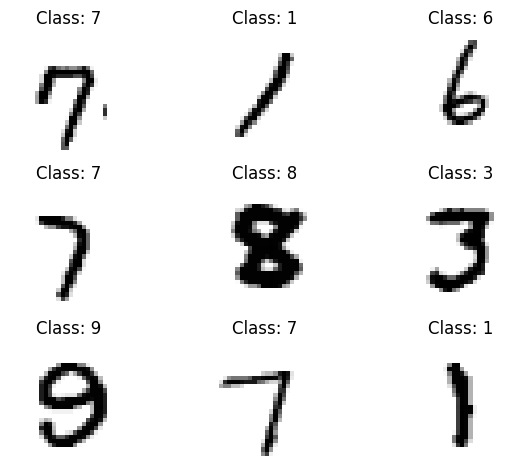

In [15]:
# plot first few images
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.title(f'Class: {np.argmax(y_train[i])}')
    plt.axis('off')
    plt.tight_layout()
    plt.imshow(X_train[i], cmap=plt.cm.binary) 


## `+` Set Global Parameters

In [17]:
BATCH_SIZE  = 32
EPOCHS      = 20

## `i` Model Design

In [18]:
model = Sequential()
model.add(LSTM(32, input_shape=(28, 28), recurrent_dropout=0.15))
model.add(Dense(10, activation='softmax'))

model.summary()

I0000 00:00:1745084448.526683  552003 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4269 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 32)             │         7,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,138 (31.79 KB)

 Trainable params: 8,138 (31.79 KB)

 Non-trainable params: 0 (0.00 B)

## `ii` Model Compilation & Training

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# fit the model
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_split=0.2)

Epoch 1/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 30s 25ms/step - accuracy: 0.8316 - loss: 0.5373 - val_accuracy: 0.9234 - val_loss: 0.2601
Epoch 2/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.8951 - loss: 0.3455 - val_accuracy: 0.9464 - val_loss: 0.1867
Epoch 3/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.9231 - loss: 0.2513 - val_accuracy: 0.9568 - val_loss: 0.1517
Epoch 4/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.9380 - loss: 0.2094 - val_accuracy: 0.9618 - val_loss: 0.1275
Epoch 5/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.9449 - loss: 0.1800 - val_accuracy: 0.9653 - val_loss: 0.1169
Epoch 6/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.9492 - loss: 0.1619 - val_accuracy: 0.9709 - val_loss: 0.0990
Epoch 7/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.9568 - loss: 0.1426 - val_accuracy: 0.9710 - val_loss: 0.0972
Epoch 8/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.9605 -

## `iii` Model Evaluation

In [25]:
# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

Test loss: 0.05685698613524437
Test accuracy: 0.9821666479110718


## `iv` Result Visualization

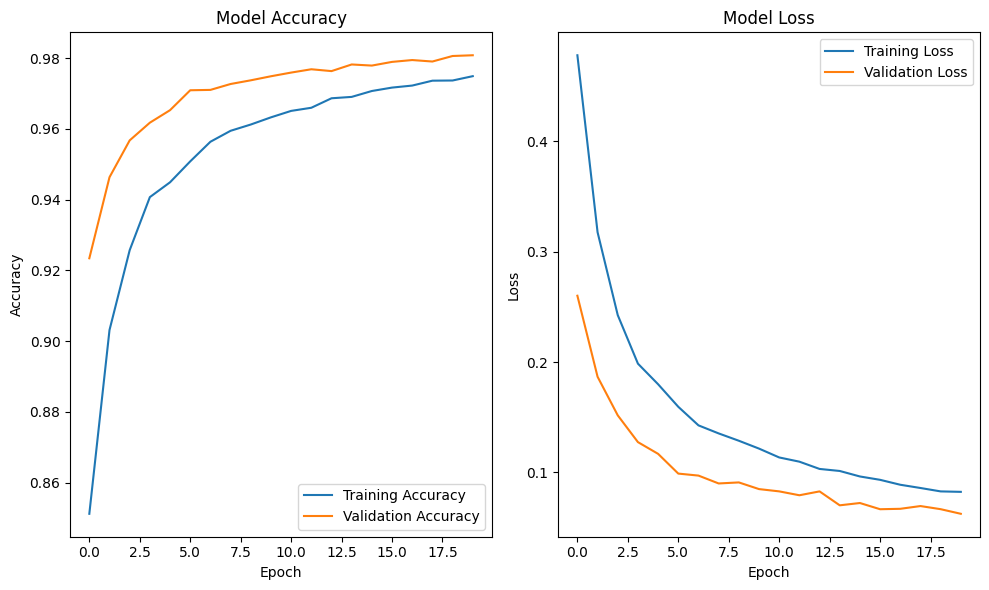

In [26]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

## `v` Let's Visualize Model Predictions

Let's try to predict the class of some test samples and plot the results.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


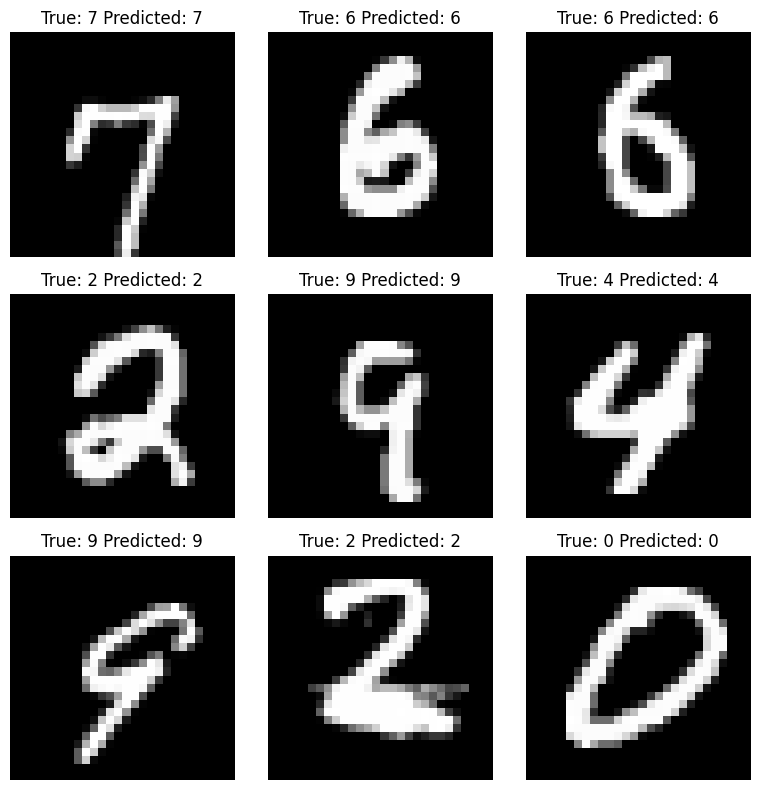

In [32]:
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.title(f'True: {np.argmax(y_test[i])} Predicted: {np.argmax(model.predict(X_test[i].reshape(1, 28, 28)))}')
    plt.axis('off')
    plt.tight_layout()
    plt.imshow(X_test[i], cmap='gray')

375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


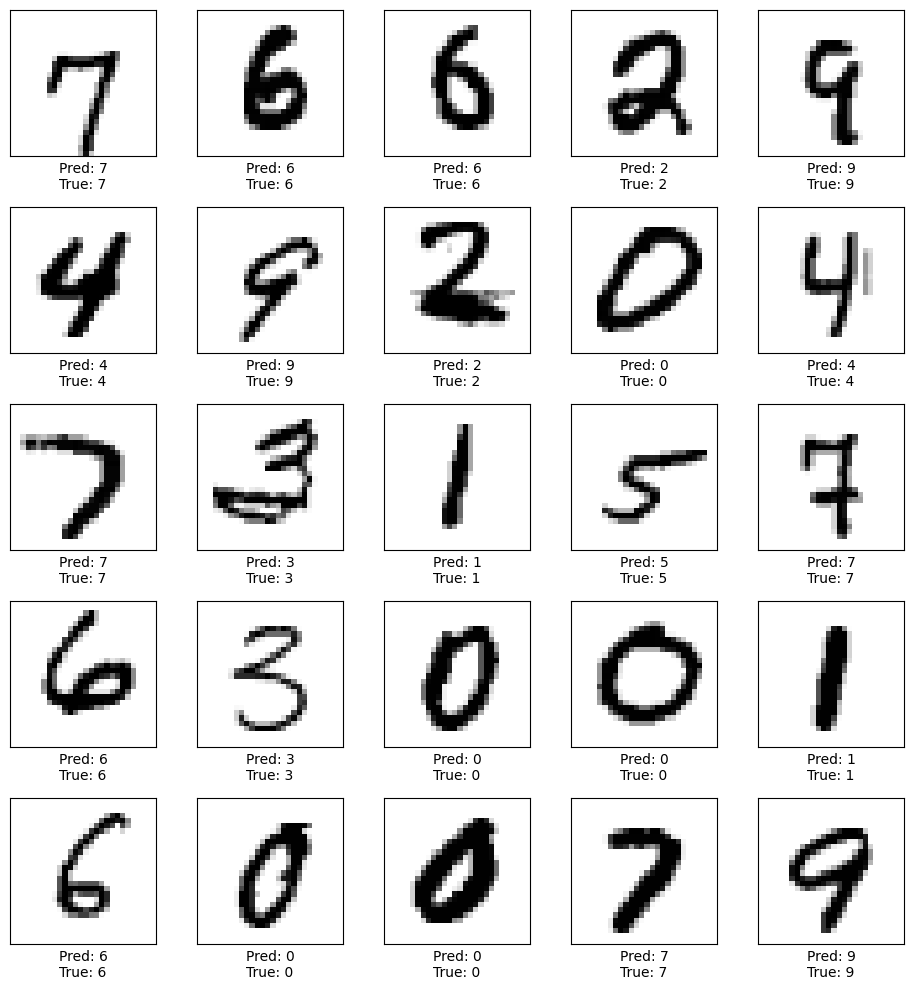

In [33]:
# Predict the classes of the test samples
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Plot some of the test samples along with their predicted and true classes
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {y_pred_classes[i]}\nTrue: {y_true[i]}")
    plt.tight_layout()
plt.show()

**Note:** You can add more trials and explore different hyperparameters and design decisions as you want.

------------------------------

# Assignment 02
- Repeat assignment `01` using `ConvLSTM1D` layer instead of `LSTM`: An LSTM utilizing the power of convolutions. Read more [here](https://paperswithcode.com/method/convlstm) and [here](https://medium.com/neuronio/an-introduction-to-convlstm-55c9025563a7).
- Use the same parameters from assignment `01` in addition to:
  - Kernel Size -> Try $1$ and $3$. Which is better?
  - Padding = `same` or `valid` -> Is there a big difference?

**Note:** You might need to reshape the input (Hint: check `keras.layers.Reshape` layer)


IMPORTANT NOTE: Make sure to organize your solution, add proper documentation, and report your insights.
------------------------------

In [ ]:
model_2 = Sequential()
model_2.add(LSTM(32, input_shape=(28, 28), recurrent_dropout=0.15))
model_2.add(Dense(10, activation='softmax'))
model_2.add(Dropout(0.5))
model_2.add(Flatten())


In [48]:
# Parameters
kernel_size = 3   # Try 1 and 3
padding = 'same'  # Try 'same' and 'valid'

model = Sequential()

# Reshape input from (28, 28) to (28, 28, 1) -> time steps, features, channels
model.add(Reshape((28, 28, 1), input_shape=(28, 28)))

# ConvLSTM1D layer
model.add(ConvLSTM1D(
    filters=32,
    kernel_size=kernel_size,
    padding=padding,
    return_sequences=False,
    dropout=0.0,
    recurrent_dropout=0.15
))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm1d_5 (ConvLSTM1D)      │ (None, 28, 32)         │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         8,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,770 (85.04 KB)

 Trainable params: 21,770 (85.04 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_split=0.2)

Epoch 1/20


I0000 00:00:1745085845.889332  566260 service.cc:152] XLA service 0x7eab18347740 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745085845.889359  566260 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-04-19 20:04:05.948398: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1745085846.160578  566260 cuda_dnn.cc:529] Loaded cuDNN version 90300


  21/1200 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.2075 - loss: 2.2628

I0000 00:00:1745085849.516325  566260 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1200/1200 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.6965 - loss: 0.9166 - val_accuracy: 0.9394 - val_loss: 0.1888
Epoch 2/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9280 - loss: 0.2311 - val_accuracy: 0.9613 - val_loss: 0.1245
Epoch 3/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9524 - loss: 0.1501 - val_accuracy: 0.9639 - val_loss: 0.1176
Epoch 4/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9620 - loss: 0.1240 - val_accuracy: 0.9754 - val_loss: 0.0805
Epoch 5/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9669 - loss: 0.1044 - val_accuracy: 0.9783 - val_loss: 0.0677
Epoch 6/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9737 - loss: 0.0842 - val_accuracy: 0.9803 - val_loss: 0.0608
Epoch 7/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9747 - loss: 0.0782 - val_accuracy: 0.9780 - val_loss: 0.0702
Epoch 8/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9794 - loss: 0.0640

In [51]:
# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

Test loss: 0.04087921977043152
Test accuracy: 0.987500011920929


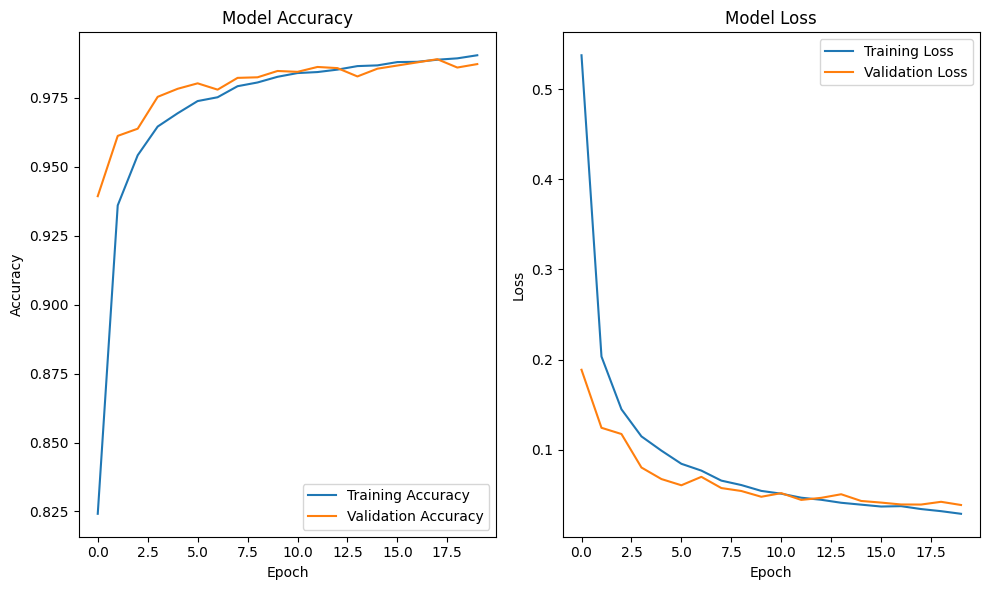

In [52]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$